In [4]:
import numpy as np
import pandas as pd

# Load the dataset
file_path = r"C:\Users\yasaswini ginjupalli\Downloads\DiabetesPrediction\assets\data_asset\diabetes.csv"
df = pd.read_csv(file_path)

def calculate_entropy(data, target_column):
    """
    Calculate entropy for a given dataset and target column.
    """
    # Get the frequency of each unique value in the target column
    value_counts = data[target_column].value_counts(normalize=True)
    # Compute entropy using the formula H = -Σ p * log2(p)
    entropy = -np.sum(value_counts * np.log2(value_counts))
    return entropy

def calculate_gini_index(data, target_column):
    """
    Calculate Gini index for a given dataset and target column.
    """
    value_counts = data[target_column].value_counts(normalize=True)
    # Compute Gini index using the formula G = 1 - Σ (p^2)
    gini = 1 - np.sum(value_counts ** 2)
    return gini

# Compute entropy and Gini index for the Outcome column
entropy_value = calculate_entropy(df, 'Outcome')
gini_value = calculate_gini_index(df, 'Outcome')

entropy_value, gini_value


(0.9331343166407831, 0.45437282986111116)

In [5]:
from sklearn.preprocessing import KBinsDiscretizer

def bin_continuous_features(data, num_bins=4):
    """
    Convert continuous features into categorical by equal-width binning.
    """
    binned_data = data.copy()
    continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('Outcome')

    # Apply equal-width binning
    discretizer = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
    binned_data[continuous_columns] = discretizer.fit_transform(data[continuous_columns])
    
    return binned_data

def information_gain(data, feature, target_column):
    """
    Compute information gain for a specific feature.
    """
    total_entropy = calculate_entropy(data, target_column)
    
    # Compute weighted entropy of the split
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = np.sum([
        (counts[i] / np.sum(counts)) * calculate_entropy(data[data[feature] == values[i]], target_column)
        for i in range(len(values))
    ])
    
    return total_entropy - weighted_entropy

def select_root_node(data, target_column='Outcome'):
    """
    Select the best root node based on information gain.
    """
    features = data.columns.drop(target_column)
    info_gains = {feature: information_gain(data, feature, target_column) for feature in features}
    
    # Return feature with highest information gain
    return max(info_gains, key=info_gains.get), info_gains

# Convert numerical features to categorical using binning
binned_df = bin_continuous_features(df)

# Determine the best root node
root_node, info_gains = select_root_node(binned_df)
root_node, info_gains


C:\Users\yasaswini ginjupalli\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


('Glucose',
 {'Pregnancies': 0.03284481959733776,
  'Glucose': 0.16235073390673893,
  'BloodPressure': 0.019868213552424963,
  'SkinThickness': 0.013421613475551819,
  'Insulin': 0.015692010078913854,
  'BMI': 0.03819117459287713,
  'DiabetesPedigreeFunction': 0.01904707261508265,
  'Age': 0.04477081453385168})

In [6]:
from sklearn.preprocessing import KBinsDiscretizer

def bin_continuous_features(data, num_bins=4, strategy='width'):
    """
    Convert continuous features into categorical by binning.

    Parameters:
    - data: DataFrame containing continuous features.
    - num_bins: Number of bins to create (default = 4).
    - strategy: Binning strategy ('width' for equal-width, 'frequency' for equal-frequency).

    Returns:
    - Binned DataFrame with categorical values.
    """
    if strategy not in ['width', 'frequency']:
        raise ValueError("Strategy must be either 'width' (equal-width binning) or 'frequency' (equal-frequency binning).")

    binned_data = data.copy()
    continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('Outcome')

    # Choose binning strategy
    binning_strategy = 'uniform' if strategy == 'width' else 'quantile'

    # Apply binning
    discretizer = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy=binning_strategy)
    binned_data[continuous_columns] = discretizer.fit_transform(data[continuous_columns])

    return binned_data

# Example usage with default parameters (equal-width binning, 4 bins)
binned_df_width = bin_continuous_features(df)

# Example usage with equal-frequency binning and 5 bins
binned_df_frequency = bin_continuous_features(df, num_bins=5, strategy='frequency')

# Display first few rows of the binned dataset
binned_df_width.head(), binned_df_frequency.head()


C:\Users\yasaswini ginjupalli\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\yasaswini ginjupalli\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:313: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
C:\Users\yasaswini ginjupalli\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:313: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(


(   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
 0          1.0      2.0            2.0            1.0      0.0  2.0   
 1          0.0      1.0            2.0            1.0      0.0  1.0   
 2          1.0      3.0            2.0            0.0      0.0  1.0   
 3          0.0      1.0            2.0            0.0      0.0  1.0   
 4          0.0      2.0            1.0            1.0      0.0  2.0   
 
    DiabetesPedigreeFunction  Age  Outcome  
 0                       0.0  1.0        1  
 1                       0.0  0.0        0  
 2                       1.0  0.0        1  
 3                       0.0  0.0        0  
 4                       3.0  0.0        1  ,
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
 0          3.0      4.0            2.0            3.0      0.0  2.0   
 1          1.0      0.0            1.0            2.0      0.0  1.0   
 2          4.0      4.0            1.0            0.0      0.0  0.0   
 3     

In [7]:
import numpy as np
import pandas as pd
from collections import Counter

class DecisionTree:
    def __init__(self, max_depth=None, binning_strategy='width', num_bins=4):
        self.max_depth = max_depth
        self.binning_strategy = binning_strategy
        self.num_bins = num_bins
        self.tree = None

    def fit(self, data, target_column='Outcome'):
        """Train the decision tree."""
        # Convert continuous features to categorical
        data = self._bin_continuous_features(data)
        
        # Build the tree recursively
        self.tree = self._build_tree(data, target_column, depth=0)

    def predict(self, sample):
        """Predict the outcome for a given sample."""
        return self._traverse_tree(sample, self.tree)
    
    def _bin_continuous_features(self, data):
        """Convert continuous features into categorical by binning."""
        continuous_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('Outcome')
        binning_strategy = 'uniform' if self.binning_strategy == 'width' else 'quantile'
        
        discretizer = KBinsDiscretizer(n_bins=self.num_bins, encode='ordinal', strategy=binning_strategy)
        data[continuous_columns] = discretizer.fit_transform(data[continuous_columns])
        return data
    
    def _calculate_entropy(self, data, target_column):
        """Calculate entropy for a given dataset and target column."""
        value_counts = data[target_column].value_counts(normalize=True)
        return -np.sum(value_counts * np.log2(value_counts + 1e-9))
    
    def _information_gain(self, data, feature, target_column):
        """Compute information gain for a specific feature."""
        total_entropy = self._calculate_entropy(data, target_column)
        values, counts = np.unique(data[feature], return_counts=True)
        weighted_entropy = np.sum([
            (counts[i] / np.sum(counts)) * self._calculate_entropy(data[data[feature] == values[i]], target_column)
            for i in range(len(values))
        ])
        return total_entropy - weighted_entropy
    
    def _best_split(self, data, target_column):
        """Find the best feature to split on based on information gain."""
        features = data.columns.drop(target_column)
        info_gains = {feature: self._information_gain(data, feature, target_column) for feature in features}
        return max(info_gains, key=info_gains.get)
    
    def _build_tree(self, data, target_column, depth):
        """Recursively build the decision tree."""
        if len(np.unique(data[target_column])) == 1:
            return data[target_column].iloc[0]
        
        if self.max_depth is not None and depth >= self.max_depth:
            return Counter(data[target_column]).most_common(1)[0][0]
        
        best_feature = self._best_split(data, target_column)
        tree = {best_feature: {}}
        
        for value in np.unique(data[best_feature]):
            subset = data[data[best_feature] == value]
            tree[best_feature][value] = self._build_tree(subset, target_column, depth + 1)
        
        return tree
    
    def _traverse_tree(self, sample, tree):
        """Traverse the tree to make a prediction."""
        if not isinstance(tree, dict):
            return tree
        
        feature = next(iter(tree))
        value = sample.get(feature, None)
        
        if value in tree[feature]:
            return self._traverse_tree(sample, tree[feature][value])
        else:
            return Counter(tree[feature].values()).most_common(1)[0][0]

# Example usage:
dt = DecisionTree(max_depth=3)
dt.fit(df)
print(dt.tree)


C:\Users\yasaswini ginjupalli\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


{'Glucose': {0.0: {'BMI': {1.0: 0, 2.0: 1}}, 1.0: {'BMI': {0.0: 0, 1.0: {'Insulin': {0.0: 0, 1.0: 1}}, 2.0: {'DiabetesPedigreeFunction': {0.0: 0, 1.0: 0, 2.0: 1}}, 3.0: 1}}, 2.0: {'Age': {0.0: {'BloodPressure': {0.0: 1, 1.0: 0, 2.0: 0, 3.0: 0}}, 1.0: {'BMI': {1.0: 0, 2.0: 1, 3.0: 1}}, 2.0: {'Insulin': {0.0: 0, 1.0: 1, 2.0: 1}}, 3.0: {'Pregnancies': {0.0: 1, 1.0: 0, 2.0: 0}}}}, 3.0: {'BMI': {1.0: {'BloodPressure': {0.0: 1, 1.0: 1, 2.0: 1, 3.0: 0}}, 2.0: {'Insulin': {0.0: 1, 1.0: 1, 2.0: 1, 3.0: 0}}, 3.0: {'SkinThickness': {1.0: 0, 2.0: 1}}}}}}


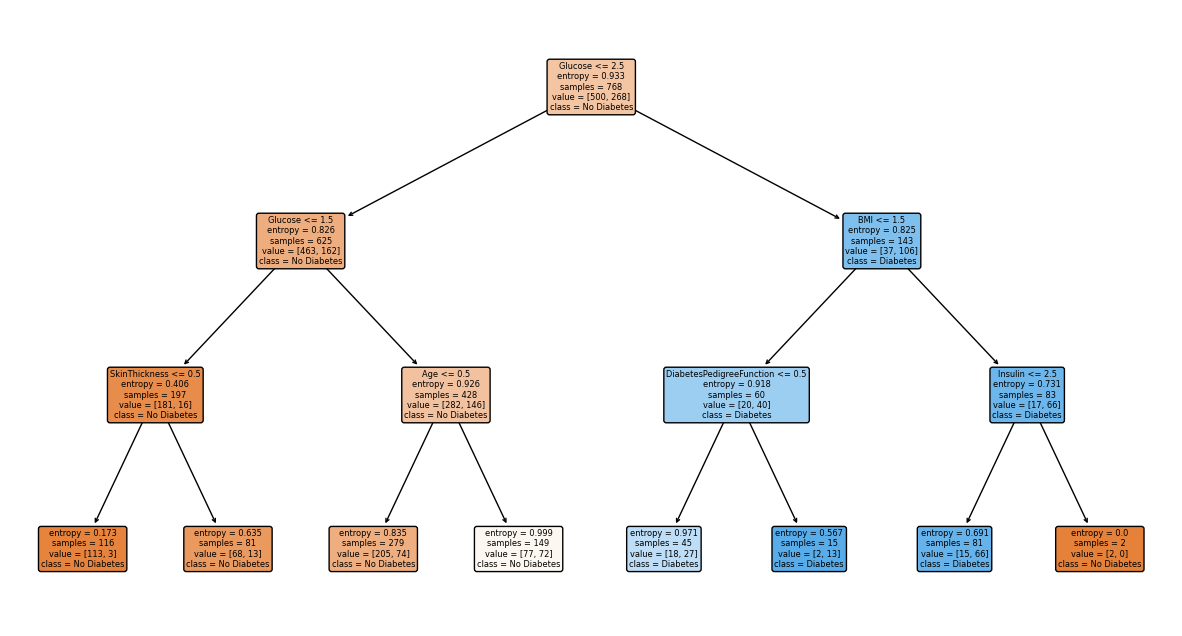

In [9]:
# Convert feature names to a list
feature_names = list(X.columns)

# Plot the decision tree again with corrected feature names
plt.figure(figsize=(15, 8))
plot_tree(clf, feature_names=feature_names, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
plt.show()


C:\Users\yasaswini ginjupalli\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


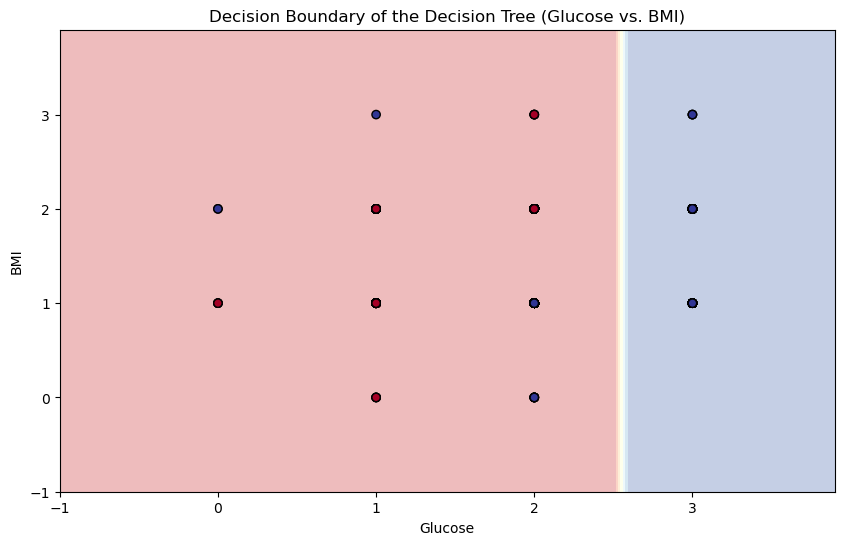

In [10]:
import numpy as np

# Select two features for visualization
selected_features = ['Glucose', 'BMI']
X_selected = binned_df[selected_features]
y_selected = binned_df['Outcome']

# Train a decision tree classifier on the selected features
clf_2d = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=42)
clf_2d.fit(X_selected, y_selected)

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X_selected[selected_features[0]].min() - 1, X_selected[selected_features[0]].max() + 1
y_min, y_max = X_selected[selected_features[1]].min() - 1, X_selected[selected_features[1]].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_selected[selected_features[0]], X_selected[selected_features[1]], c=y_selected, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.title("Decision Boundary of the Decision Tree (Glucose vs. BMI)")
plt.show()
